In [96]:
%matplotlib inline
import cv2
import numpy as np
from matplotlib import pyplot as plt
import re
import time
import glob
import os
import random

import sys
from paths import Paths
paths = Paths()
sys.path.append(paths.scripts_root)
import util
import ip_routines as ip

import imutils

%load_ext autoreload
%autoreload 2

# Display entire width of browser
from IPython.display import display, HTML
display(HTML(data="""
<style>
    div#notebook-container    { width: 95%; }
    div#menubar-container     { width: 65%; }
    div#maintoolbar-container { width: 99%; }
</style>
"""))

paths.print_paths()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Paths defined in paths module:
 paths.data_root: /Users/trafferty/data
 paths.notebook_root: /Users/trafferty/data/notebooks
 paths.scripts_root: /Users/trafferty/data/scripts
 paths.images_root: /Users/trafferty/data/images
 paths.projects_root: /Users/trafferty/data/projects
 paths.results_root: /Users/trafferty/data/results
 paths.tmp_root: /Users/trafferty/data/tmp
 paths.dat_root: /Users/trafferty/data/dat
 paths.tmp_dir: /Users/trafferty/tmp
 paths.ws_dir: /Users/trafferty/workspace
 paths.mii_home: /Users/trafferty/dev
 paths.inhouse: /Users/trafferty/dev/src/inhouse


In [57]:
local = True
if local:
    folder_root = f"{paths.tmp_dir}/ttm_marks/NZ2CDS3_20191108_IP_TTMD"
else:
    folder_root = "/Volumes/Data/NZ2CDS3/byDate/2019/11/08/B1/startTime_19_02_04_lot_232496_191108_MMO_Longevity_FF"

In [73]:
TTM_img_paths = glob.glob("%s/*.png" % (folder_root))
TTM_img_files = [os.path.basename(path) for path in TTM_img_paths ]

# B1-IP_TTMD-20191108_190526_138275+0900-w1-p1-s9-f5-1r1-2r141818-3r0.png
# suffix = 'B1-IP_TTMD'
# regex = r"%s-[0-9_+]*-w[1-9]-p1-s[0-9]-f5-.*png" % (suffix, f)
#LB_regex = r".*f5-.*png"

locs        = ["LB",  "LF",  "RF",  "RB" ]
search_strs = ['-f5-','-f6-','-f7-','-f8-']

file_paths = {}
for loc, search_str in zip(locs, search_strs):
    file_paths[loc] = [ x for x in TTM_img_paths if x.find(search_str)>-1 ]
    
for loc in locs:
    print(f"Found {len(file_paths[loc])} for location {loc}")
          
# LB_file_paths = [ x for x in TTM_img_paths if x.find('-f5-')>-1 ]
# LF_file_paths = [ x for x in TTM_img_paths if x.find('-f6-')>-1 ]
# RF_file_paths = [ x for x in TTM_img_paths if x.find('-f7-')>-1 ]
# RB_file_paths = [ x for x in TTM_img_paths if x.find('-f8-')>-1 ]

Found 1276 for location LB
Found 1276 for location LF
Found 1276 for location RF
Found 1276 for location RB


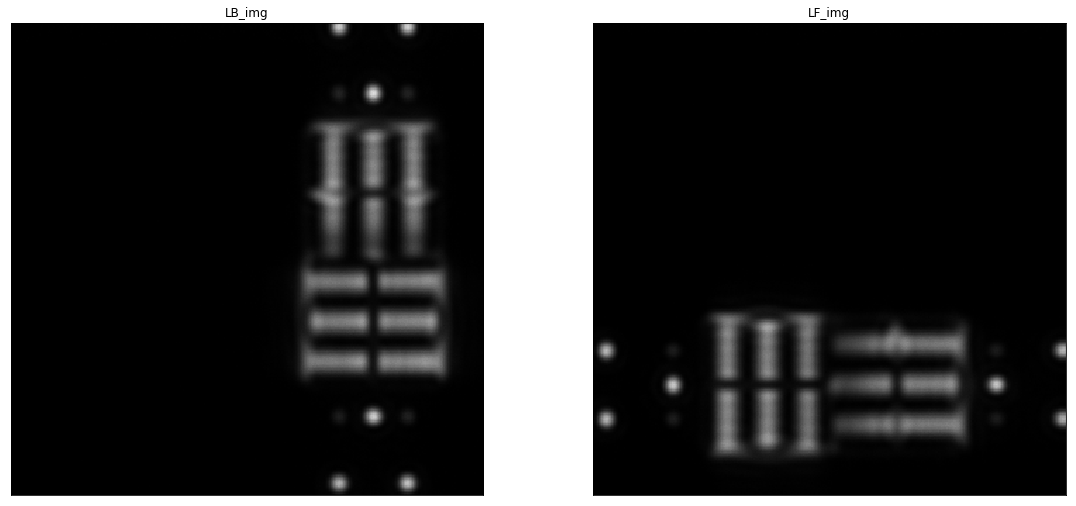

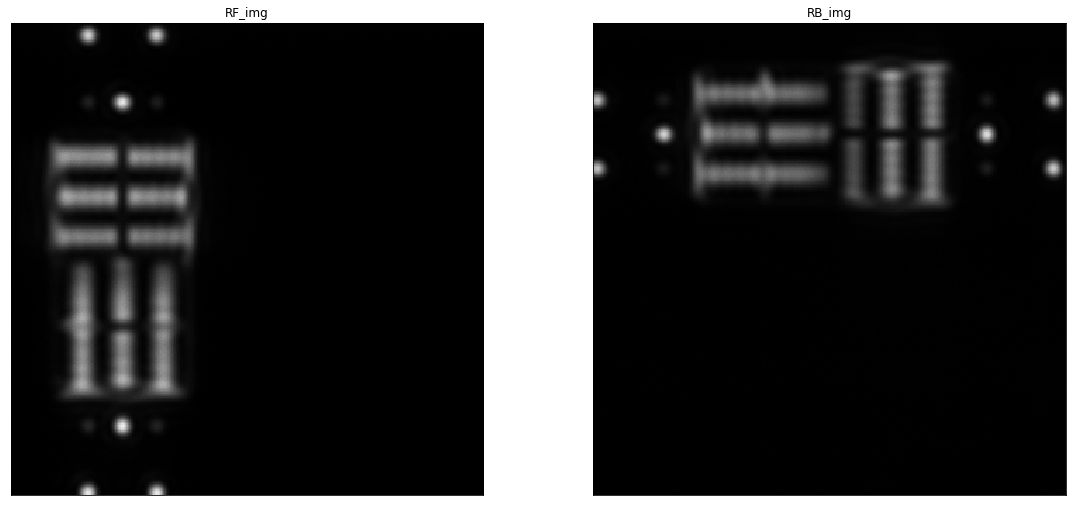

In [88]:
LB_img = cv2.imread(file_paths["LB"][0], 0)
LF_img = cv2.imread(file_paths["LF"][0], 0)
RF_img = cv2.imread(file_paths["RF"][0], 0)
RB_img = cv2.imread(file_paths["RB"][0], 0)

util.plot_imgs([(LB_img,'LB_img'), (LF_img,'LF_img'), (RF_img, "RF_img"), (RB_img, "RB_img")], max_cols = 2)

ROI_extract_img image: c=336, r=336
ROI_extract_img image: c=70, r=336
((0, 65), (224, 289)): y: 65, x: 65
((273, 338), (224, 289)): y: 65, x: 65


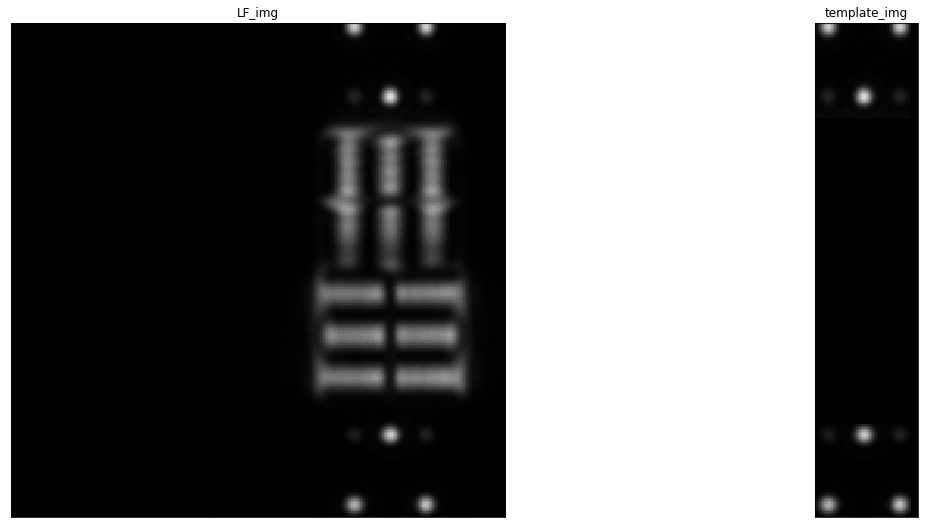

In [121]:
ROI_extract_img = LB_img.copy()
r,c = ROI_extract_img.shape[::-1]
print(f"ROI_extract_img image: c={c}, r={r}")

template_img = np.zeros((r, 70), dtype='uint8')
print(f"ROI_extract_img image: c={template_img.shape[::-1][0]}, r={template_img.shape[::-1][1]}")

locs = [(256,32), (256,305)]
h,w = 65,65
for loc in locs:
    s = ip.calcSlice(loc, h, w)
    print(f"{s}: y: {abs(s[0][0]-s[0][1])}, x: {abs(s[1][0]-s[1][1])}")
    template_img[s[0][0]:s[0][1], 0:w] = ROI_extract_img[s[0][0]:s[0][1], s[1][0]:s[1][1]]

util.plot_imgs([(LB_img,'LF_img'), (template_img,'template_img'), ], max_cols = 2)

ROI_extract_img image: c=336, r=336


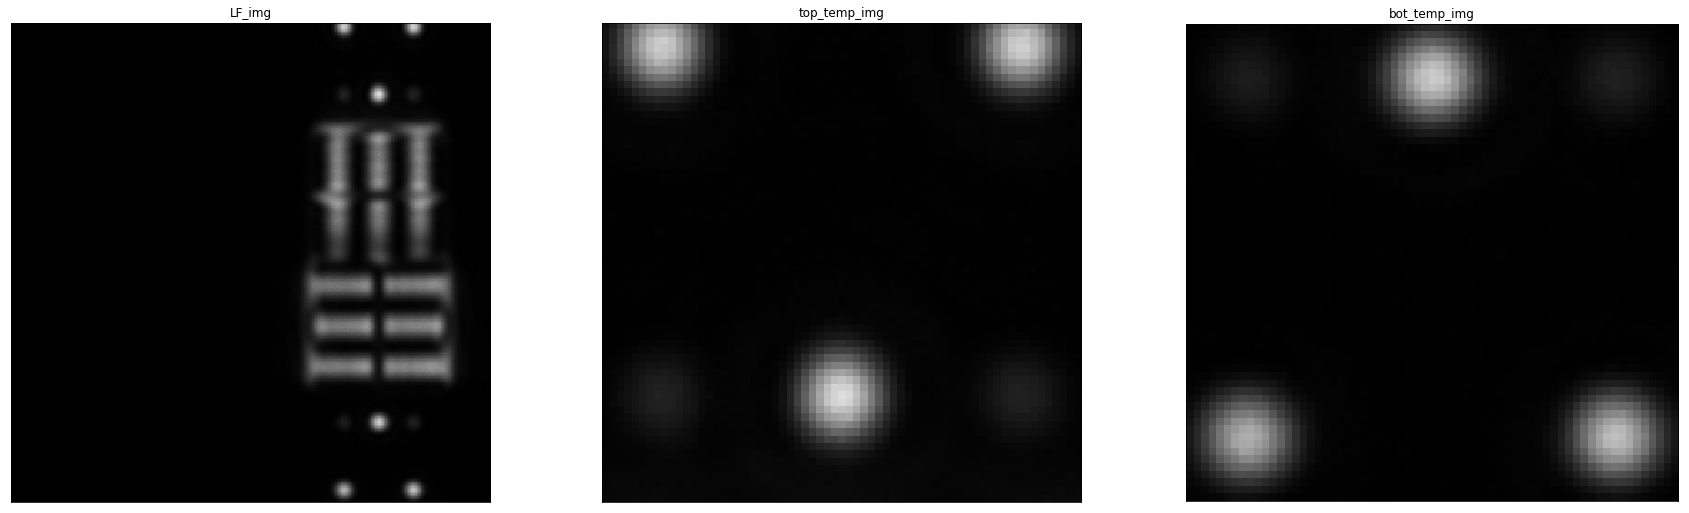

In [184]:
ROI_extract_img = LB_img.copy()
r,c = ROI_extract_img.shape[::-1]
print(f"ROI_extract_img image: c={c}, r={r}")

target_h, target_w = 65,65
# top_temp_img = np.zeros((target_w, target_h), dtype='uint8')
# bot_temp_img = np.zeros((target_w, target_h), dtype='uint8')
# print(f"ROI_extract_img image: c={template_img.shape[::-1][0]}, r={template_img.shape[::-1][1]}")

locs = [(265,35), (256,305)]

s = ip.calcSlice((257,32), target_h, target_w)
top_temp_img = ROI_extract_img[s[0][0]:s[0][1], s[1][0]:s[1][1]]

s = ip.calcSlice((257,305), target_h, target_w)
bot_temp_img = ROI_extract_img[s[0][0]:s[0][1], s[1][0]:s[1][1]]

util.plot_imgs([(LB_img,'LF_img'), (top_temp_img,'top_temp_img'), (bot_temp_img,'bot_temp_img'), ], max_cols = 3)

(255, 32)
(256, 32)
(257, 32)
(258, 32)
(259, 32)
(256, 33)
(257, 33)
(258, 33)
(259, 33)
(256, 34)
(257, 34)
(258, 34)
(257.1666666666667, 32.833333333333336)
(257, 303)
(255, 304)
(256, 304)
(257, 304)
(258, 304)
(259, 304)
(255, 305)
(256, 305)
(257, 305)
(258, 305)
(259, 305)
(257.0, 304.3636363636364)


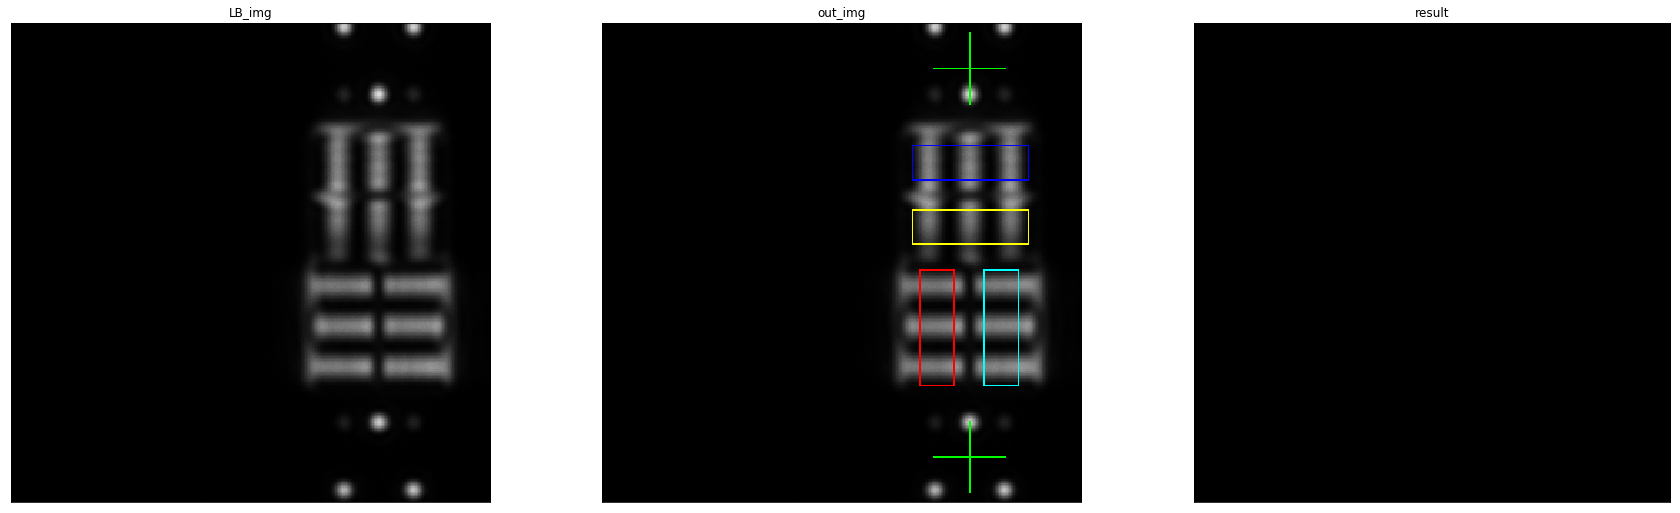

In [242]:

threshold = 0.9
method = cv2.TM_CCOEFF_NORMED
out_img = cv2.cvtColor(LB_img.copy(),cv2.COLOR_GRAY2BGR)


result = cv2.matchTemplate(LB_img, top_temp_img, method)
loc = np.where( result >= threshold)
pts=[]
for pt in zip(*loc[::-1]):
    cp = (pt[0] + int(target_w/2), pt[1] + int(target_w/2))
    pts.append(cp)
    print(f"{cp}")
    #cv2.circle(out_img, cp, 2, util.green, 1)
    #ip.cross(out_img, cp, 100, util.green, 1)
    #cv2.rectangle(out_img, (pt[0],pt[1]), (pt[0]+target_w,pt[1]+target_h), util.green, 1)

top_pt = tuple(map(np.mean, zip(*pts)))
print(top_pt)
ip.cross(out_img, (int(top_pt[0]),int(top_pt[1])), 50, util.green, 1)
    
result = cv2.matchTemplate(LB_img, bot_temp_img, method)
loc = np.where( result >= threshold)
pts=[]
for pt in zip(*loc[::-1]):
    cp = (pt[0] + int(target_w/2), pt[1] + int(target_w/2))
    pts.append(cp)
    print(f"{cp}")
    #cv2.circle(out_img, cp, 2, util.green, 1)
    #ip.cross(out_img, cp, 100, util.green, 1)
    #cv2.rectangle(out_img, (pt[0],pt[1]), (pt[0]+target_w,pt[1]+target_h), util.green, 1)

bot_pt = tuple(map(np.mean, zip(*pts)))
print(bot_pt)
ip.cross(out_img, (int(bot_pt[0]),int(bot_pt[1])), 50, util.green, 1)

vec = tuple(np.subtract(bot_pt, top_pt ))

ROI_w = int(target_w * 1.25) 
ROI_h = int(ROI_w * 0.3)

ROIs = []
x, y = int(top_pt[0]+vec[0])-int(ROI_w/2), int(int(top_pt[1])+ vec[1] * 0.2 )
ROIs.append((x,y))
cv2.rectangle(out_img, (x,y), (x+ROI_w, y+ROI_h), util.blue, 1)    

x, y = x, y+45
ROIs.append((x,y))
cv2.rectangle(out_img, (x,y), (x+ROI_w, y+ROI_h), util.yellow, 1)    

x, y = int(top_pt[0]+vec[0])-35, int(int(top_pt[1])+ vec[1] * 0.52 )
ROIs.append((x,y))
cv2.rectangle(out_img, (x,y), (x+ROI_h, y+ROI_w), util.red, 1)    

x, y = x+45, y
ROIs.append((x,y))
cv2.rectangle(out_img, (x,y), (x+ROI_h, y+ROI_w), util.cyan, 1)    

for ROI in ROIs:
    x,y = *ROI
    roi_img = LB_img[x:x+]

util.plot_imgs([(LB_img, 'LB_img'), (out_img, 'out_img'), (result, 'result')], max_cols = 3)

In [207]:
tuple(np.subtract(bot_pt, top_pt ))

(-0.16666666666668561, 271.53030303030306)

In [150]:
print (result)

[[ 1.55037507e-01  1.50469795e-01  1.45632595e-01 ...  3.76485199e-01
   4.37795788e-01  4.84373480e-01]
 [ 1.32184759e-01  1.29864141e-01  1.28071547e-01 ...  3.72370631e-01
   4.32886630e-01  4.78932559e-01]
 [ 1.20888814e-01  1.25000268e-01  1.26500398e-01 ...  3.59330654e-01
   4.17921484e-01  4.62614655e-01]
 ...
 [-6.06681919e-03 -6.06334629e-03 -5.62228449e-03 ... -2.52844766e-02
  -1.95624009e-02 -1.50430882e-02]
 [-6.49051601e-03 -6.03903551e-03 -5.60144661e-03 ... -1.36054279e-02
  -6.11052150e-03 -3.18659702e-04]
 [-6.06681919e-03 -6.06681919e-03 -6.08765660e-03 ...  3.25122557e-04
   9.79807414e-03  1.70945115e-02]]
